In [10]:
import pandas as pd
import arcgis
from arcgis.gis import GIS
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
%matplotlib inline
import numpy as np
from scipy.special import erf
import arcgis
arcgis.env.out_spatial_reference = 4326
from IPython.display import display

In [11]:
df_count = pd.read_csv('./Illinois_Counties_1.csv')

In [12]:
df_count

,Year,Cases,Deaths,Youngest,Oldest,Mean Age,Num Female,Num Male,Counties,Cook County Cases,Chicago Deaths
0,2007,101,~NaN~,0.1,87,50,38,63,48,33,~NaN~
1,2008,20,~NaN~,16,86,54,12,8,28,9,~NaN~
2,2009,5,~NaN~,~NaN~,~NaN~,~NaN~,2,3,36,1,~NaN~
3,2010,61,4,18,92,57,27,34,30,30,1
4,2011,34,3,9,88,62,15,19,19,22,1
5,2012,290,12,9,89,57,143,147,55,174,5
6,2013,117,11,14,92,59,61,56,76,60,7


In [13]:
df_count.dtypes

Year                  int64
Cases                 int64
Deaths               object
Youngest             object
Oldest               object
Mean Age             object
Num Female            int64
Num Male              int64
Counties              int64
Cook County Cases     int64
Chicago Deaths       object
dtype: object

[Text(0,0.5,'# of Cases'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'Cases of WNV in Cook County')]

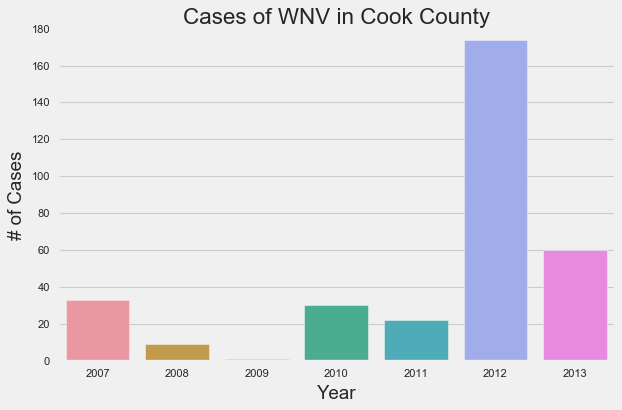

In [431]:
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x = 'Year', y = 'Cook County Cases', data = df_count)
ax.set(ylabel='# of Cases', 
       xlabel='Year', 
       title='Cases of WNV in Cook County')

In [15]:
gis = GIS('https://www.arcgis.com', 'atcarl', 'pass84GIS')

In [16]:
toolboxes = gis.content.search('travel', 'Geoprocessing Toolbox', 
                               outside_org=True, max_items=3)

In [17]:
map1 = gis.map('Chicago', zoomlevel=10)

In [18]:
map1.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [19]:
map1.basemap = 'topo'
map1

In [20]:
map1.center

[41.884250000000065, -87.63244999999995]

In [21]:
map2 = gis.map('Chicago', zoomlevel=10)

In [22]:
map2.basemap = 'topo'
map2

In [23]:
df_spray = pd.read_csv('./spray_clean.csv')

In [24]:
df_spray.head()

,Unnamed: 0,Date,Latitude,Longitude,Year,Month,Day
0,0,2011-08-29,42.391623,-88.089163,2011,8,29
1,1,2011-08-29,42.391348,-88.089163,2011,8,29
2,2,2011-08-29,42.391022,-88.089157,2011,8,29
3,3,2011-08-29,42.390637,-88.089158,2011,8,29
4,4,2011-08-29,42.390410,-88.088858,2011,8,29


In [30]:
portal_gis = GIS("https://acarl.maps.arcgis.com", "atcarl", "pass84GIS")
spray = portal_gis.content.search("spray_clean", "Feature Layer")

<Item title:"spray_clean" type:Feature Layer Collection owner:atcarl>
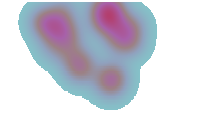

In [31]:
spray[0]

In [32]:
map1.add_layer(spray[0])

In [33]:
portal_gis = GIS("https://acarl.maps.arcgis.com", "atcarl", "pass84GIS")
parks = portal_gis.content.search("Park_Locations", "Feature Layer")

<Item title:"Park_Locations" type:Feature Layer Collection owner:atcarl>
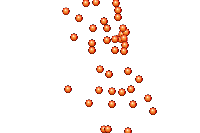

In [34]:
parks[0]

In [35]:
map1.add_layer(parks[0])

In [37]:
map1

In [38]:
portal_gis = GIS("https://acarl.maps.arcgis.com", "atcarl", "pass84GIS")
water = portal_gis.content.search("Hydro", "Feature Layer")

<Item title:"Hydro" type:Feature Layer Collection owner:atcarl>
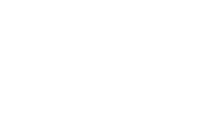

In [39]:
water[0]

In [40]:
map2.add_layer(water[0])

In [42]:
map2

In [43]:
map2.add_layer(spray[0])

In [44]:
portal_gis = GIS("https://acarl.maps.arcgis.com", "atcarl", "pass84GIS")
traps = portal_gis.content.search("Mos_traps", "Feature Layer")

In [45]:
traps[0]

<Item title:"Mos_traps2" type:Feature Layer Collection owner:atcarl>

In [46]:
map3 = gis.map('Chicago', zoomlevel=10)

In [47]:
map3.add_layer(traps[0])

In [48]:
map3.add_layer(spray[0])

In [49]:
map3.basemap = 'topo'
map3

In [50]:
portal_gis = GIS("https://acarl.maps.arcgis.com", "atcarl", "pass84GIS")
gardens = portal_gis.content.search("Gardens", "Feature Layer")

<Item title:"Gardens" type:Feature Layer Collection owner:atcarl>
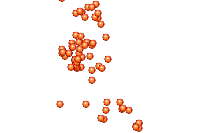

In [51]:
gardens[0]

In [52]:
map4 = gis.map('Chicago', zoomlevel=10)

In [53]:
map4.basemap = 'topo'
map4

In [54]:
map4.add_layer(gardens[0])

In [55]:
map4.add_layer(spray[0])

In [99]:
xtrain_df = pd.read_csv('./X_train_clean_v1.csv')

In [100]:
xtrain_df.head()

,Unnamed: 0,Block,Trap,Latitude,Longitude,Id,Year_x,Month_x,Day_x,DayofYear,...,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
0,0,41,T002,41.954690,-87.800991,1,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,41,T002,41.954690,-87.800991,2,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,62,T007,41.994991,-87.769279,3,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,79,T015,41.974089,-87.824812,4,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,79,T015,41.974089,-87.824812,5,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
list(xtrain_df.columns)

['Unnamed: 0',
 'Block',
 'Trap',
 'Latitude',
 'Longitude',
 'Id',
 'Year_x',
 'Month_x',
 'Day_x',
 'DayofYear',
 'culex',
 'erraticus',
 'pipiens',
 'restuans',
 'salinarius',
 'tarsalis',
 'territans',
 '60018',
 '60106',
 '60605',
 '60607',
 '60608',
 '60609',
 '60611',
 '60612',
 '60613',
 '60614',
 '60615',
 '60617',
 '60618',
 '60619',
 '60620',
 '60621',
 '60622',
 '60623',
 '60625',
 '60626',
 '60628',
 '60629',
 '60630',
 '60631',
 '60632',
 '60633',
 '60634',
 '60636',
 '60637',
 '60638',
 '60639',
 '60640',
 '60641',
 '60642',
 '60643',
 '60645',
 '60646',
 '60647',
 '60649',
 '60651',
 '60652',
 '60654',
 '60655',
 '60656',
 '60659',
 '60660',
 '60666',
 '60707',
 '60803',
 '60827',
 'Station',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'BCFG',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MIFG',
 'RA',
 '

In [102]:
xtrain_df.shape

(10506, 101)

In [103]:
ytrain_df = pd.read_csv('./y_train_clean')

In [104]:
ytrain_df.head()

,0,0.1
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [105]:
xtest_df = pd.read_csv('./X_test_clean_v1.csv')

In [106]:
xtest_df.head()

,Unnamed: 0,Id,Block,Trap,Latitude,Longitude,Year_x,Month_x,Day_x,DayofYear,...,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
0,0,1,41,T002,41.95469,-87.800991,2008,6,11,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,41,T002,41.95469,-87.800991,2008,6,11,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,41,T002,41.95469,-87.800991,2008,6,11,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,41,T002,41.95469,-87.800991,2008,6,11,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,41,T002,41.95469,-87.800991,2008,6,11,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
list(xtest_df.columns)

['Unnamed: 0',
 'Id',
 'Block',
 'Trap',
 'Latitude',
 'Longitude',
 'Year_x',
 'Month_x',
 'Day_x',
 'DayofYear',
 'culex',
 'erraticus',
 'pipiens',
 'restuans',
 'salinarius',
 'tarsalis',
 'territans',
 '60018',
 '60106',
 '60605',
 '60607',
 '60608',
 '60609',
 '60611',
 '60612',
 '60613',
 '60614',
 '60615',
 '60617',
 '60618',
 '60619',
 '60620',
 '60621',
 '60622',
 '60623',
 '60625',
 '60626',
 '60628',
 '60629',
 '60630',
 '60631',
 '60632',
 '60633',
 '60634',
 '60636',
 '60637',
 '60638',
 '60639',
 '60640',
 '60641',
 '60642',
 '60643',
 '60645',
 '60646',
 '60647',
 '60649',
 '60651',
 '60652',
 '60654',
 '60655',
 '60656',
 '60659',
 '60660',
 '60666',
 '60707',
 '60803',
 '60827',
 'Station',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'BCFG',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MIFG',
 'RA',
 '

In [108]:
xtest_df.shape

(116293, 101)

In [128]:
df_2007 = xtrain_df[xtrain_df['Year_x']==2007]
df_2008 = xtest_df[xtest_df['Year_x']==2008]
df_2009 = xtrain_df[xtrain_df['Year_x']==2009]
df_2010 = xtest_df[xtest_df['Year_x']==2010]
df_2011 = xtrain_df[xtrain_df['Year_x']==2011]
df_2012 = xtest_df[xtest_df['Year_x']==2012]
df_2013 = xtrain_df[xtrain_df['Year_x']==2013]
df_2014 = xtest_df[xtest_df['Year_x']==2014]

In [134]:
df_2007.shape, df_2008.shape, df_2009.shape, df_2010.shape, df_2011.shape, df_2012.shape, df_2013.shape,df_2014.shape

((3811, 101),
 (30498, 101),
 (2249, 101),
 (36557, 101),
 (2054, 101),
 (27115, 101),
 (2392, 101),
 (22123, 101))

In [136]:
df_2007.head()

,Unnamed: 0,Block,Trap,Latitude,Longitude,Id,Year_x,Month_x,Day_x,DayofYear,...,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
0,0,41,T002,41.954690,-87.800991,1,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,41,T002,41.954690,-87.800991,2,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,62,T007,41.994991,-87.769279,3,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,79,T015,41.974089,-87.824812,4,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,79,T015,41.974089,-87.824812,5,2007,5,29,149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
list(df_2007.columns)

['Unnamed: 0',
 'Block',
 'Trap',
 'Latitude',
 'Longitude',
 'Id',
 'Year_x',
 'Month_x',
 'Day_x',
 'DayofYear',
 'culex',
 'erraticus',
 'pipiens',
 'restuans',
 'salinarius',
 'tarsalis',
 'territans',
 '60018',
 '60106',
 '60605',
 '60607',
 '60608',
 '60609',
 '60611',
 '60612',
 '60613',
 '60614',
 '60615',
 '60617',
 '60618',
 '60619',
 '60620',
 '60621',
 '60622',
 '60623',
 '60625',
 '60626',
 '60628',
 '60629',
 '60630',
 '60631',
 '60632',
 '60633',
 '60634',
 '60636',
 '60637',
 '60638',
 '60639',
 '60640',
 '60641',
 '60642',
 '60643',
 '60645',
 '60646',
 '60647',
 '60649',
 '60651',
 '60652',
 '60654',
 '60655',
 '60656',
 '60659',
 '60660',
 '60666',
 '60707',
 '60803',
 '60827',
 'Station',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'BCFG',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MIFG',
 'RA',
 '

In [409]:
tot7 = len(df_2007)

In [410]:
cul7 = (sum(df_2007['culex']) / tot7 * 100)
err7 = (sum(df_2007['erraticus']) / tot7 * 100)
pip7 = (sum(df_2007['pipiens']) / tot7 * 100)
res7 = (sum(df_2007['restuans']) / tot7 * 100)
sal7 = (sum(df_2007['salinarius']) / tot7 * 100)
tar7 = (sum(df_2007['tarsalis']) / tot7 * 100)
ter7 = (sum(df_2007['territans']) / tot7 * 100)

In [413]:
x7 = [cul7, err7, pip7, res7, sal7, tar7, ter7]

In [414]:
lst7 = pd.DataFrame(x7, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

In [415]:
lst7

,col
Culex,100.000000
Erraticus,0.000000
Pipiens,82.812910
restuans,54.001574
Salinarius,1.075833
Tarsalis,0.000000
Territans,2.860142


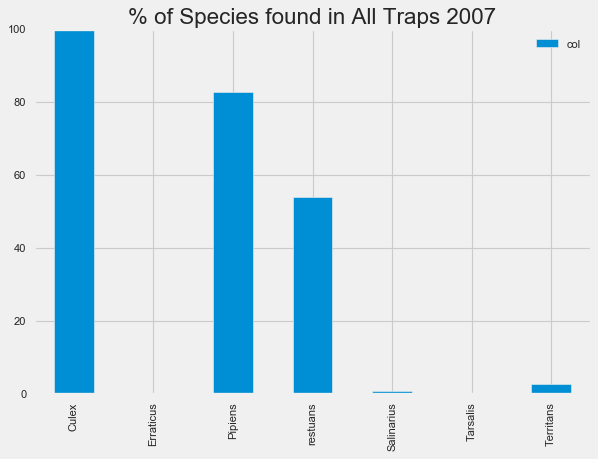

In [416]:
plt.figure(figsize=(8,5))
lst7.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2007');

In [335]:
tot8 = len(df_2008)

In [336]:
cul8 = (sum(df_2008['culex']) / tot8 * 100)
err8 = (sum(df_2008['erraticus']) / tot8 * 100)
pip8 = (sum(df_2008['pipiens']) / tot8 * 100)
res8 = (sum(df_2008['restuans']) / tot8 * 100)
sal8 = (sum(df_2008['salinarius']) / tot8 * 100)
tar8 = (sum(df_2008['tarsalis']) / tot8 * 100)
ter8 = (sum(df_2008['territans']) / tot8 * 100)

In [348]:
x8 = [cul8, err8, pip8, res8, sal8, tar8, ter8]

In [349]:
lst8 = pd.DataFrame(x8, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

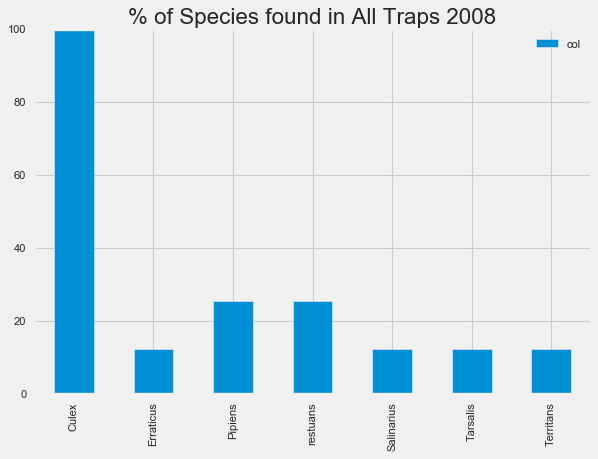

In [417]:
plt.figure(figsize=(8,5))
lst8.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2008');

In [377]:
tot9 = len(df_2009)

In [378]:
cul9 = (sum(df_2009['culex']) / tot9 * 100)
err9 = (sum(df_2009['erraticus']) / tot9 * 100)
pip9 = (sum(df_2009['pipiens']) / tot9 * 100)
res9 = (sum(df_2009['restuans']) / tot9 * 100)
sal9 = (sum(df_2009['salinarius']) / tot9 * 100)
tar9 = (sum(df_2009['tarsalis']) / tot9 * 100)
ter9 = (sum(df_2009['territans']) / tot9 * 100)

In [379]:
x9 = [cul9, err9, pip9, res9, sal9, tar9, ter9]

In [380]:
lst9 = pd.DataFrame(x9, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

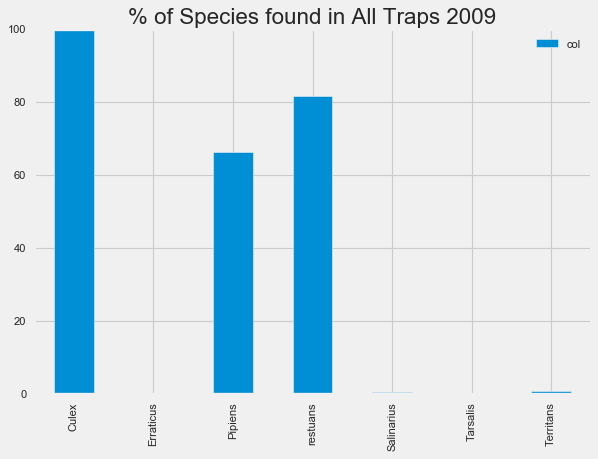

In [418]:
plt.figure(figsize=(8,5))
lst9.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2009');

In [371]:
tot10 = len(df_2010)

In [384]:
cul10 = (sum(df_2010['culex']) / tot10 * 100)
err10 = (sum(df_2010['erraticus']) / tot10 * 100)
pip10 = (sum(df_2010['pipiens']) / tot10 * 100)
res10 = (sum(df_2010['restuans']) / tot10 * 100)
sal10 = (sum(df_2010['salinarius']) / tot10 * 100)
tar10 = (sum(df_2010['tarsalis']) / tot10 * 100)
ter10 = (sum(df_2010['territans']) / tot10 * 100)

In [385]:
x10 = [cul10, err10, pip10, res10, sal10, tar10, ter10]

In [386]:
lst10 = pd.DataFrame(x10, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

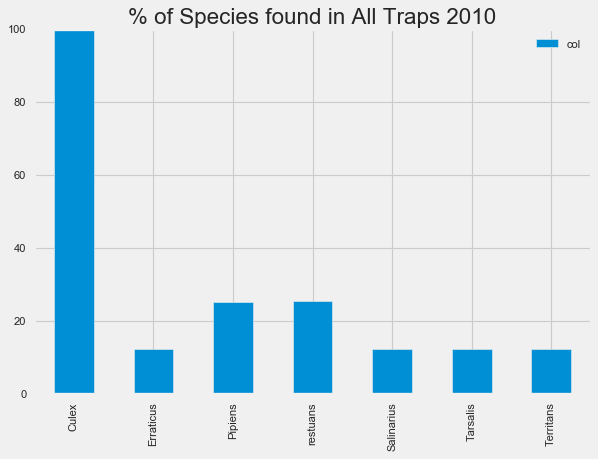

In [419]:
plt.figure(figsize=(8,5))
lst10.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2010');

In [388]:
tot11 = len(df_2011)

In [389]:
cul11 = (sum(df_2011['culex']) / tot11 * 100)
err11 = (sum(df_2011['erraticus']) / tot11 * 100)
pip11 = (sum(df_2011['pipiens']) / tot11 * 100)
res11 = (sum(df_2011['restuans']) / tot11 * 100)
sal11 = (sum(df_2011['salinarius']) / tot11 * 100)
tar11 = (sum(df_2011['tarsalis']) / tot11 * 100)
ter11 = (sum(df_2011['territans']) / tot11 * 100)

In [390]:
x11 = [cul11, err11, pip11, res11, sal11, tar11, ter11]

In [392]:
lst11 = pd.DataFrame(x11, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

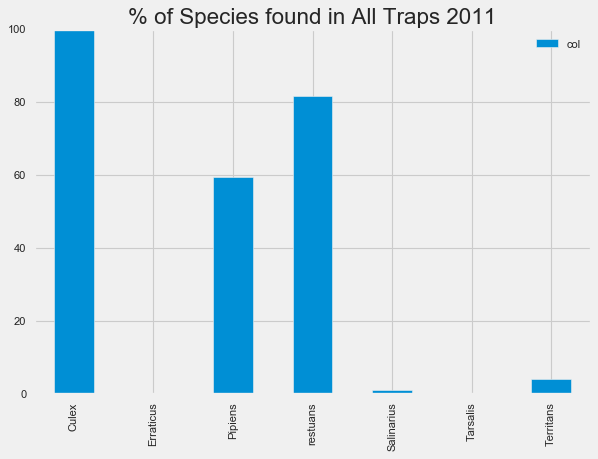

In [420]:
plt.figure(figsize=(8,5))
lst11.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2011');

In [394]:
tot12 = len(df_2012)

In [395]:
cul12 = (sum(df_2012['culex']) / tot12 * 100)
err12 = (sum(df_2012['erraticus']) / tot12 * 100)
pip12 = (sum(df_2012['pipiens']) / tot12 * 100)
res12 = (sum(df_2012['restuans']) / tot12 * 100)
sal12 = (sum(df_2012['salinarius']) / tot12 * 100)
tar12 = (sum(df_2012['tarsalis']) / tot12 * 100)
ter12 = (sum(df_2012['territans']) / tot12 * 100)

In [396]:
x12 = [cul12, err12, pip12, res12, sal12, tar12, ter12]

In [397]:
lst12 = pd.DataFrame(x12, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

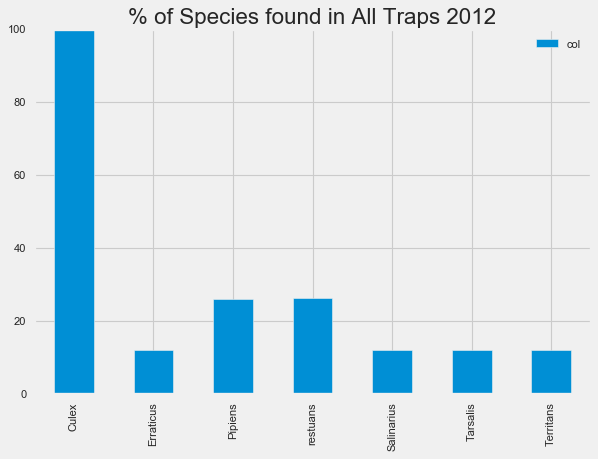

In [421]:
plt.figure(figsize=(8,5))
lst12.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2012');

In [399]:
tot13 = len(df_2013)

In [400]:
cul13 = (sum(df_2013['culex']) / tot13 * 100)
err13 = (sum(df_2013['erraticus']) / tot13 * 100)
pip13 = (sum(df_2013['pipiens']) / tot13 * 100)
res13 = (sum(df_2013['restuans']) / tot13 * 100)
sal13 = (sum(df_2013['salinarius']) / tot13 * 100)
tar13 = (sum(df_2013['tarsalis']) / tot13 * 100)
ter13 = (sum(df_2013['territans']) / tot13 * 100)

In [402]:
x13 = [cul13, err13, pip13, res13, sal13, tar13, ter13]
lst13 = pd.DataFrame(x13, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

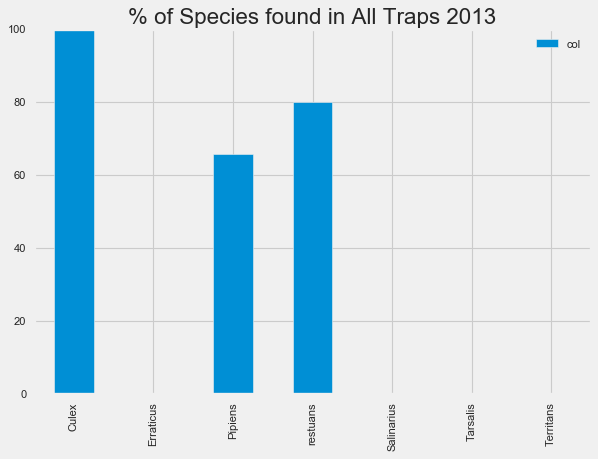

In [422]:
plt.figure(figsize=(8,5))
lst13.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2013');

In [404]:
tot14 = len(df_2014)

In [405]:
cul14 = (sum(df_2014['culex']) / tot14 * 100)
err14 = (sum(df_2014['erraticus']) / tot14 * 100)
pip14 = (sum(df_2014['pipiens']) / tot14 * 100)
res14 = (sum(df_2014['restuans']) / tot14 * 100)
sal14 = (sum(df_2014['salinarius']) / tot14 * 100)
tar14 = (sum(df_2014['tarsalis']) / tot14 * 100)
ter14 = (sum(df_2014['territans']) / tot14 * 100)

In [406]:
x14 = [cul14, err14, pip14, res14, sal14, tar14, ter14]
lst14 = pd.DataFrame(x14, index=['Culex', 'Erraticus', 'Pipiens', 'restuans', 
                              'Salinarius', 'Tarsalis', 'Territans'], columns=['col'])

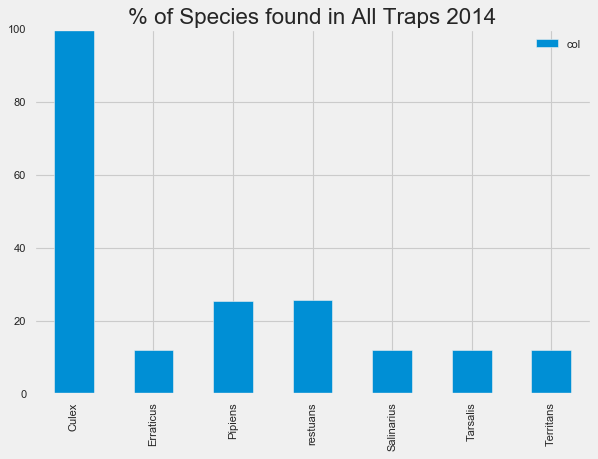

In [428]:
plt.figure(figsize=(8,5))
lst14.plot(kind = 'bar') 
plt.xticks
plt.ylabel=('% of Species')
plt.xlabel=('Species') 
plt.title('% of Species found in All Traps 2014');